# Название проекта: "Большой БигДатовский и Властелин Пандаса: Анализ фильмов и сериалов с IMBD"

## Описание датасета:


IMDB - это популярный зарубежный сайт с рейтингами на кино и сериалы. Там любой желающий может поставить рейтинг фильму или сериалу, а также написать рецензию.

Этот датасет содержит более 7-ми тысяч фильмов и сериалов с оценками, взятыми с IMDB.

### Содержание

Колонки

Name: Название фильма/сериала

Data: Дата создания

Rate: Рейтинг с IMDB

Votes: Количества голосов

Genre: Жанр

Duration: Продолжительность

Type: тип ('Series' или 'Film')

### Возрастной рейтинг:

TV-Y: Designed to be appropriate for all children

TV-Y7: Suitable for ages 7 and up

G: Suitable for General Audiences

TV-G: Suitable for General Audiences

PG: Parental Guidance suggested

TV-PG: Parental Guidance suggested

PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.

R: Restricted. May be inappropriate for ages 17 and under.

TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.

NC-17: Inappropriate for ages 17 and under

### Доп столбцы

Episodes: Number of Episodes only for series

Nudity, violence and etc.: How much does it have of these

Ссылка на датасет: [IMDB-Rating](https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series)

Let's code!!! 

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Причесываем датасет

In [129]:
data = pd.read_csv(r'/Users/User/Desktop/VS code/BDA_2024-2025/project/imdb.csv')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Удалим повторяющиеся фильмы и сериалы (поверьте, они есть)

In [130]:
data = data.drop_duplicates(subset='Name')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Уберем фильмы/сериалы без рейтинга

In [131]:
data = data[data['Rate'] != 'No Rate']
data = data[data['Votes'] != 'No Votes']
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


In [132]:
data['Votes'] = data['Votes'].str.replace(',','').astype(float)
data['Rate'] = data['Rate'].astype(float)
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492.0,Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448.0,"Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887.0,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


# Проверка первой гипотезы

$H_0$: Рейтинги фильмов с высоким количеством голосов (например, >10000) в среднем не отличаются от рейтингов фильмов с меньшим количеством голосов.

$H_1$: Фильмы с большим количеством голосов имеют более высокие рейтинги в среднем

In [133]:
Films = data[data['Type'] == 'Film']
films_huge_votes = Films[Films['Votes'] > 10000]
films_huge_votes.sort_values(by='Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
270,The Dark Knight,2008,9.0,2428117.0,"Action, Crime, Drama",152.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Severe
318,Inception,2010,8.8,2178860.0,"Action, Adventure, Sci-Fi",148.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Moderate
339,Fight Club,1999,8.8,1948261.0,Drama,139.0,Film,R,-,Moderate,Severe,Severe,Moderate,Severe
320,Pulp Fiction,1994,8.9,1915230.0,"Crime, Drama",154.0,Film,R,-,Moderate,Severe,Severe,Severe,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,The Little Vampire,2000,5.8,10173.0,"Adventure, Comedy, Family",95.0,Film,PG,-,No Rate,Mild,NaN,Mild,Mild
3225,Pánico en el Transiberiano,1972,6.6,10137.0,"Adventure, Horror, Sci-Fi",91.0,Film,R,-,NaN,Moderate,NaN,Mild,Moderate
4334,Spontaneous,2020,6.5,10096.0,"Comedy, Horror, Romance",101.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
3448,The Nun's Story,1959,7.6,10056.0,Drama,149.0,Film,Not Rated,-,Mild,Mild,NaN,Mild,Mild


In [134]:
films_little_votes = Films[Films['Votes'] <= 10000]
films_little_votes.sort_values(by='Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
4571,Locked Down,2021,5.2,9994.0,"Comedy, Crime, Romance",118.0,Film,R,-,Mild,NaN,Moderate,Mild,Mild
3721,Psycho Goreman,2020,6.3,9898.0,"Comedy, Horror, Sci-Fi",95.0,Film,Not Rated,-,NaN,Severe,Moderate,NaN,Mild
4331,True History of the Kelly Gang,2019,6.0,9824.0,"Biography, Crime, Drama",124.0,Film,R,-,Moderate,Severe,Severe,Mild,Severe
2665,Dronningen,2019,7.1,9820.0,Drama,127.0,Film,NC-17,-,Severe,Mild,Mild,Mild,Moderate
914,Annette,2021,6.4,9794.0,"Drama, Musical, Romance",141.0,Film,R,-,Severe,Moderate,Moderate,Moderate,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,The Black Book,2021,3.3,69.0,Horror,75.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4991,The Forgiven,2021,6.8,62.0,Drama,117.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4818,Snuff Films,2007,4.1,61.0,Horror,73.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4367,The Survivor,2021,7.4,53.0,"Biography, Drama",129.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate


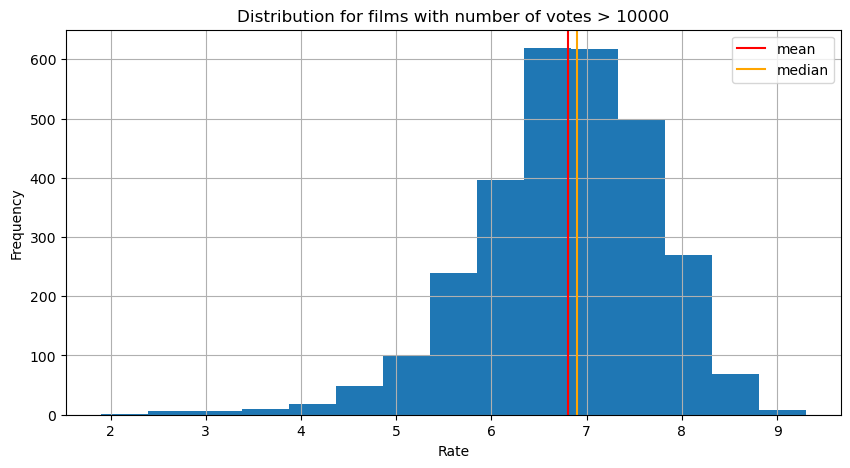

In [135]:
rate_counts_huge= films_huge_votes.Rate.astype(float)
plt.figure(figsize = (10,5))
rate_counts_huge.hist(bins=15)
plt.axvline(rate_counts_huge.mean(), color='red', label='mean')
plt.axvline(rate_counts_huge.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with number of votes > 10000')
plt.legend()
plt.show()

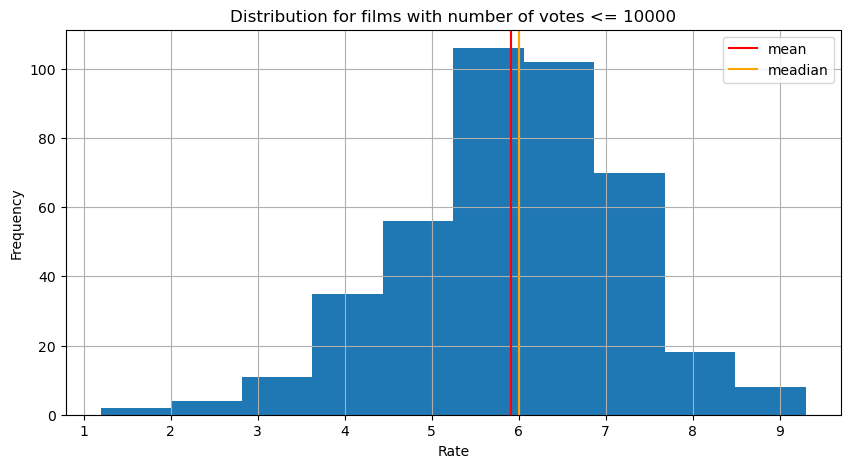

In [136]:
rate_counts_little = films_little_votes.Rate.astype(float)
plt.figure(figsize = (10,5))
rate_counts_little.hist(bins=10)
plt.axvline(rate_counts_little.mean(), color='red', label='mean')
plt.axvline(rate_counts_little.median(), color='orange', label='meadian')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with number of votes <= 10000')
plt.legend()
plt.show()

Распределения практически нормальные, выборки несвязные - используем двухвыборочный критерий Стьюдента!

Двувыборочный критерий Стьюдента (проверка гипотезы о равенстве средних двух выборок)
$$H_0: \mu_1 = \mu_2\\
H_1: \mu_1 \ne \mu_2$$
Распределение выборок должно не иметь выбросов, быть умеренно асимметричным (т.е. близким к нормальному).

In [137]:
from scipy import stats

stats.ttest_ind(rate_counts_huge, rate_counts_little)

TtestResult(statistic=17.02778167025298, pvalue=2.138480742511395e-62, df=3314.0)

Таким образом получили, что нулевая гипотеза $H_0$ не подтвердилась, то есть мы подтвердили справедливость $H_1$. Это значит, что средние рейтинги не совпали.

А в нашем случае вышло,  что чем больше отзывов у фильма, тем выше у него рейтинг!

# Проверка второй гипотезы

$H_0$: Средний рейтинг фильмов с возрастным ограничением "R" равне среднему рейтингу фильмов с возрастным ограничением "PG-13".

$H_1$: Средний рейтинг фильмов с возрастным ограничением "R" не равен среднему рейтингу фильмов с возрастным ограничением "PG-13".

In [138]:
films_r = Films[Films['Certificate']=='R']
films_pg = Films[Films['Certificate']=='PG-13']

rate_counts_r = films_r.Rate.astype(float)
rate_counts_pg = films_pg.Rate.astype(float)
rate_counts_r

1       6.3
2       6.4
20      7.7
29      6.1
31      6.3
       ... 
5013    6.3
5016    7.1
5020    6.3
5025    7.3
5027    6.3
Name: Rate, Length: 1473, dtype: float64

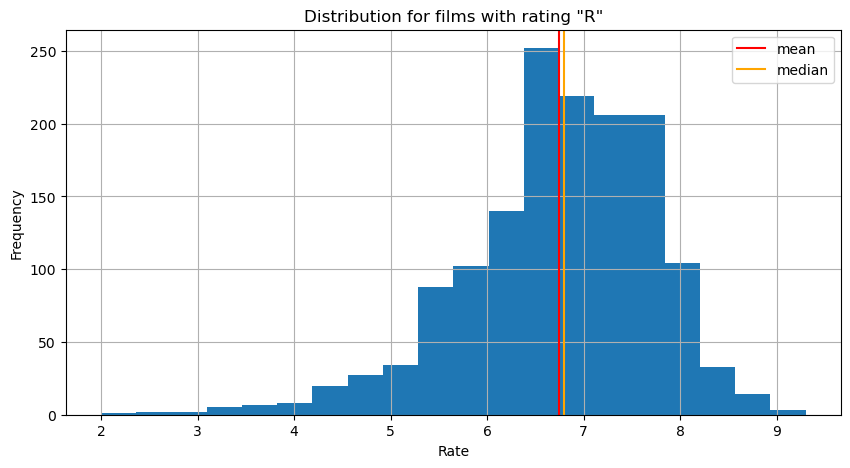

In [139]:
plt.figure(figsize = (10,5))
rate_counts_r.hist(bins=20)
plt.axvline(rate_counts_r.mean(), color='red', label='mean')
plt.axvline(rate_counts_r.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with rating "R"')
plt.legend()
plt.show()

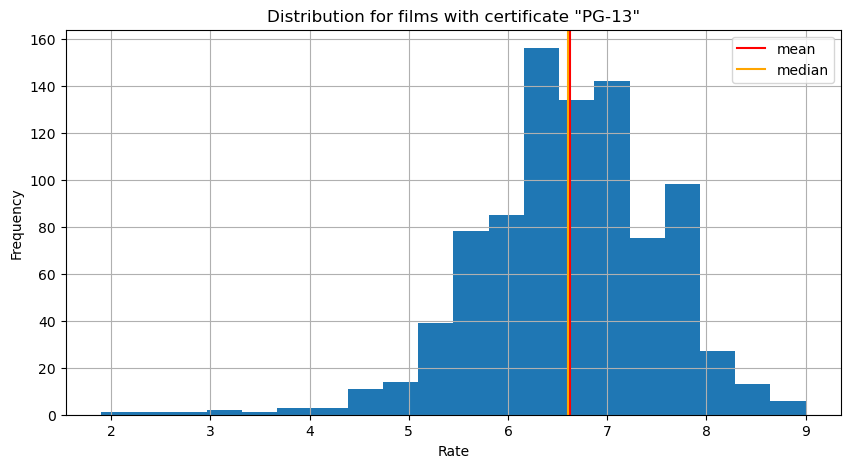

In [140]:
plt.figure(figsize = (10,5))
rate_counts_pg.hist(bins=20)
plt.axvline(rate_counts_pg.mean(), color='red', label='mean')
plt.axvline(rate_counts_pg.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with certificate "PG-13"')
plt.legend()
plt.show()

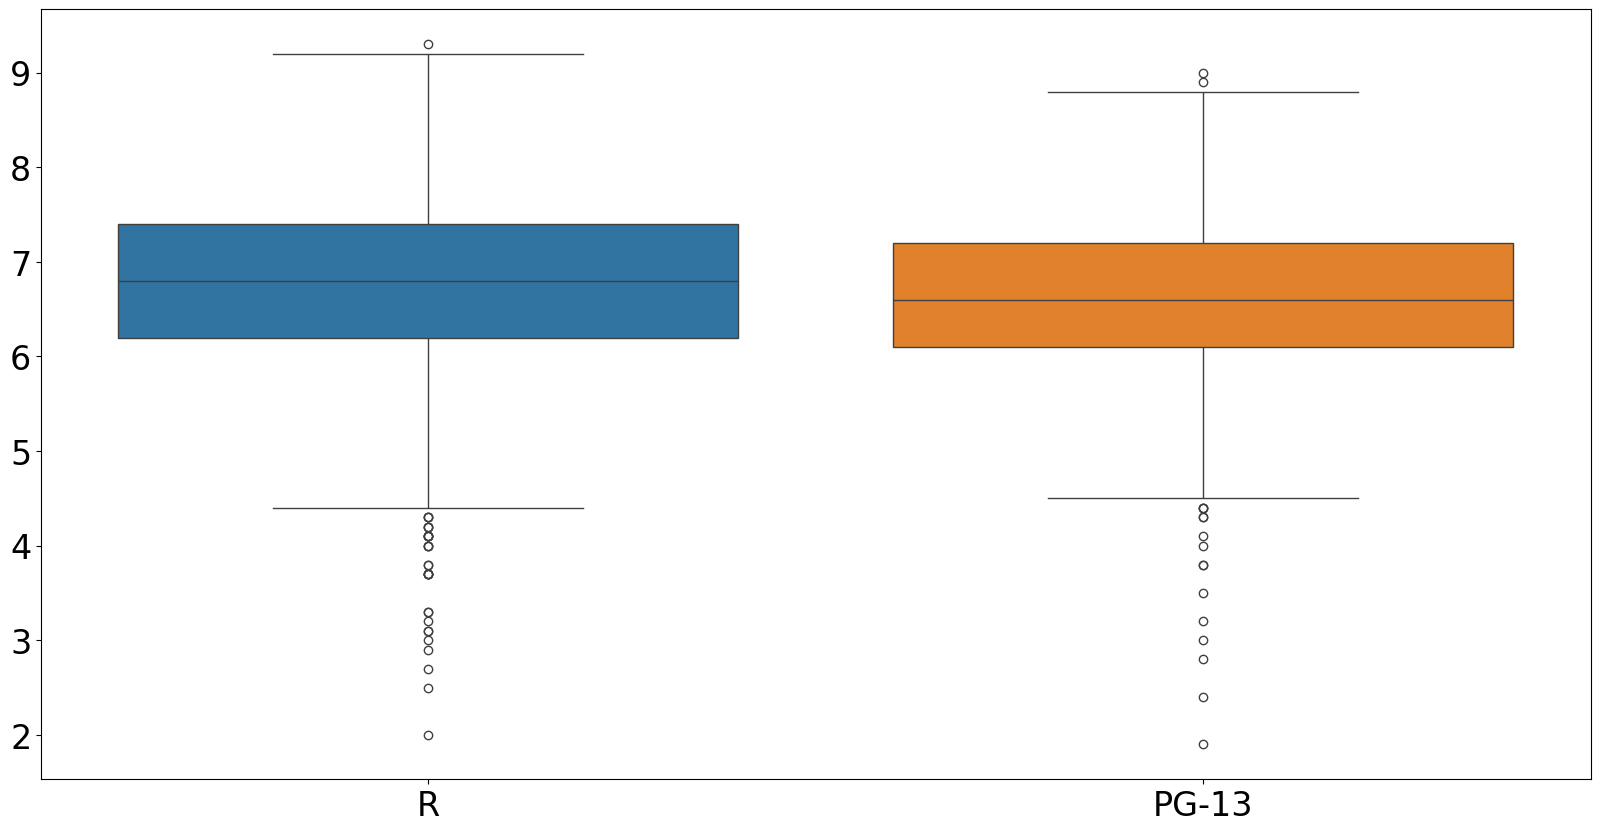

In [141]:
df = pd.DataFrame(
    {'R': rate_counts_r,
     'PG-13': rate_counts_pg
    }
)

plt.figure(figsize=(20,10))
plt.gca().tick_params(axis='both', which='major', labelsize=24)
sns.boxplot(data=df)
plt.xticks([0,1], ['R', 'PG-13'])
plt.show()

Чето много выбросов...

Проверим на тестах Шапиро о нормальности распредлений

In [142]:
stats.shapiro(rate_counts_r)

ShapiroResult(statistic=0.9671040456975281, pvalue=8.446728504859191e-18)

In [143]:
stats.shapiro(rate_counts_pg)

ShapiroResult(statistic=0.9758998727406755, pvalue=5.768768887236057e-11)

Таким образом распределение рейтингов для данных возрастных ограничений будем считать ненормальными. Как следствие используем тест Уилкосона-Манна-Уитни.

In [144]:
stats.mannwhitneyu(rate_counts_r, rate_counts_pg)

MannwhitneyuResult(statistic=719793.5, pvalue=6.228689480555366e-05)

А если бы считали нормально-распределенными наборами данных

In [145]:
stats.ttest_ind(rate_counts_r, rate_counts_pg)

TtestResult(statistic=2.943208481222916, pvalue=0.003279973495395114, df=2361.0)

Выводы пока непонятны...

# Проверка третьей гипотезы

In [159]:
Films_new=Films[Films['Votes'] < 100000]

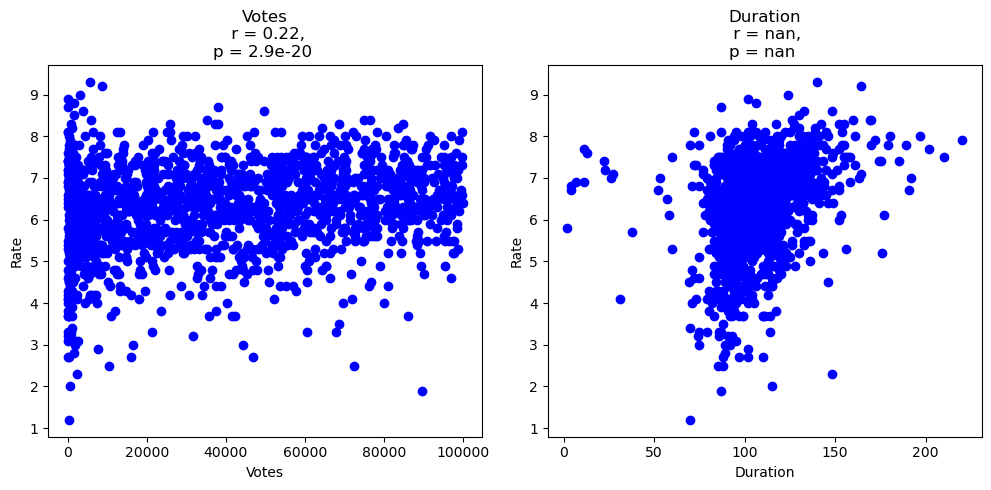

In [160]:
plt.figure(figsize=(25,5))
features=['Votes', 'Duration']
for i,feature in enumerate(features,start=1):
    plt.subplot(1,5,i)
    x = Films_new[feature]
    y = Films_new['Rate']
    regres = stats.linregress(x,y)
    plt.plot(x,y,'bo')
    plt.ylabel("Rate")
    plt.xlabel(feature)
    plt.title(f'{feature}\n r = {regres.rvalue:.2f},\np = {regres.pvalue:.1e} ')
plt.tight_layout()